# **빅데이터 개론 Lab 10 - 로지스틱 회귀분석**

참고자료 : https://www.notion.so/TA-2689a38b5289413a82671d3956fea103

- - -




### **<로지스틱 회귀분석>**

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTNfMjUg/MDAxNTg0MDgwNjAzNDQ4.stg44EjmKsUiCbav6P4HPZpzQocCNcN3L6DUwQBC5lgg.25bRo94dsEGXtmZ-Z0CtQhXKlTVkkz3E5VPaq0oNvXog.PNG.y4769/%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%93%9C4.PNG?type=w800" width="600" height="300">


<br>

### **<독립변수(설명변수)와 종속변수(반응변수)의 관계>**

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTNfMTc3/MDAxNTg0MDgwNjAzNDQy.lXx6Ca-LIa0kaeCULOE9wWqUQsZt1KzSOZDKsRpwbREg._lAOicl-kDpLz4SYa9_37_rYCtUNhL_IYFOMYz4v-Hgg.PNG.y4769/%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%93%9C6.PNG?type=w800" width="600" height="300">

  1. 선형 회귀분석이 말 그대로 독립변수와 종속변수 사이의 선형적 관계를 그래프로 나타낸 것이라면, 로지스틱 회귀분석은 선형이 아닌 "S" 곡선의 특성을 나타낸다.

  2. 로지스틱 회귀분석의 곡선에서 종속변수의 확률이 0.5보다 크면 어떤 사건이 일어난다고 보고, 0.5보다 작으면 어떤 사건이 일어나지 않을 것이라고 확률적으로 예측해볼 수 있다.




```
glm(formula, data, family = "binomial") 
# binomial 옵션은 반응변수가 두 가지의 값(이항)만 가진다고 glm에게 알려줌
```


In [ ]:
install.packages(c("tidyverse", "data.table", "caret", "e1071"))
library(tidyverse)
library(data.table)
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




#### **A. 예제 1**

---


1. **HR(Human Resource, 인사관리)_연습데이터([링크](https://www.dropbox.com/sh/xx1w2syi768kfu0/AACZgxgo1fcxyDMgv9U-iTz8a?dl=0))**

* 변수 설명

```
satisfaction_level : 직무 만족도
last_evaluation : 마지막 평가점수
number_project : 진행 프로젝트 수
average_monthly_hours : 월평균 근무시간
time_spend_company : 근속년수
work_accident : 사건사고 여부(0: 없음, 1: 있음, 범주형)
left : 이직 여부(0: 잔류, 1: 이직, 범주형)
promotion_last_5years: 최근 5년간 승진여부(0: 승진 x, 1: 승진, 범주형)
sales : 부서(범주형)
salary : 임금 수준(범주형)
```


In [ ]:
# 자신의 깃허브에서 자료를 읽어온다.
hr_DF <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/HR_comma_sep.csv", sep = ",") %>% as_tibble()

In [ ]:
hr_DF %>% str()

tibble [14,999 × 10] (S3: tbl_df/tbl/data.frame)
 $ satisfaction_level   : num [1:14999] 0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num [1:14999] 0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int [1:14999] 2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int [1:14999] 157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int [1:14999] 3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int [1:14999] 0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int [1:14999] 1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int [1:14999] 0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : chr [1:14999] "sales" "sales" "sales" "sales" ...
 $ salary               : chr [1:14999] "low" "medium" "medium" "low" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
hr_DF %>% summary()

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000      
 Max.   :10.000     Max.  

* 범주형 변수 확인

In [ ]:
# unique를 사용하여 salary가 char형인지 확인한다.
# 범주형으로 바꿔준다. -> 밑에 값들도 char형인 것을 알 수 있다. -> 더미변수로 바꿔준다.
# 더미변수는 범주형 변수를 연속형 변수로 변환한 것인데, 정확히 따지자면 연속형 변수"스럽게" 만든 것이다.


hr_DF$sales %>% unique() # 범주형~

[1] "sales"       "accounting"  "hr"          "technical"   "support"    
 [6] "management"  "IT"          "product_mng" "marketing"   "RandD"

In [ ]:
hr_DF$salary %>% unique()

[1] "low"    "medium" "high"

In [ ]:
hr_DF$Work_accident %>% unique()

[1] 0 1

In [ ]:
hr_DF$left %>% unique()

[1] 1 0

In [ ]:
hr_DF$promotion_last_5years %>% unique()

[1] 0 1

* mutate를 이용한 데이터 타입 변경(int or chr ---> factor)

In [ ]:
# 데이터 타입을 범주형에서 facter로 바꿔준다. 
# 값을 넘겨줄때는 꼭 벡터형식(c())으로 넘겨줘야 한다. 
# char형이 facter로 바뀐것을 볼 수 있다.

hr_DF <- hr_DF %>% mutate_at(`.vars` = c("sales", "salary", "Work_accident", "left", "promotion_last_5years"), `.funs` = as.factor)
hr_DF %>% str()

tibble [14,999 × 10] (S3: tbl_df/tbl/data.frame)
 $ satisfaction_level   : num [1:14999] 0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num [1:14999] 0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int [1:14999] 2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int [1:14999] 157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int [1:14999] 3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ left                 : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ promotion_last_5years: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


* **train-test split**

In [ ]:
# train set, test set 데이터로 나눠준다.
# caret 패키지의 createDataPartition를 이용해 데이터를 나눠준다.

library(caret) 
set.seed(31)

index <- createDataPartition(y = hr_DF$left, p = 0.7, list = FALSE) # y에 반응변수인 left(이직여부)값을 넣어준다. 
head(index, 30)# train set 데이터 보기 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Resample1
1
2
3
10
11
13
14
15
17
18


In [ ]:
# train 과 test 데이터에 뭐가 들어있는지 본다. 
train <- hr_DF[index, ]# 70%의 데이터가 들어감
test <- hr_DF[-index, ]# 30%의 데이터가 들어감

train %>% show()
test %>% show()

Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


# A tibble: 10,500 x 10
   satisfaction_le… last_evaluation number_project average_montly_…
              <dbl>           <dbl>          <int>            <int>
 1             0.38            0.53              2              157
 2             0.8             0.86              5              262
 3             0.11            0.88              7              272
 4             0.42            0.53              2              142
 5             0.45            0.54              2              135
 6             0.84            0.92              4              234
 7             0.41            0.55              2              148
 8             0.36            0.56              2              137
 9             0.45            0.47              2              160
10             0.78            0.99              4              255
# … with 10,490 more rows, and 6 more variables: time_spend_company <int>,
#   Work_accident <fct>, left <fct>, promotion_last_5years <fct>, sales <fct>,
#   sa

* **train set을 이용한 glm 모델 생성**

In [ ]:
# 로지스틱 회귀 이용하기 위해 glm함수 이용한다.
# glm(formula(반응변수와 설명변수), data, family='binomial'(변수가 범주형 이라는 것을 알려주는것))

m <- glm(left ~ ., data = train, family = "binomial")# 반응변수 = left , 설명변수 = 반응변수 제외한 모든변수
summary(m)


Call:
glm(formula = left ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2035  -0.6677  -0.4059  -0.1184   3.0579  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.5464001  0.2273690  -6.801 1.04e-11 ***
satisfaction_level     -4.0225402  0.1162796 -34.594  < 2e-16 ***
last_evaluation         0.8681242  0.1783553   4.867 1.13e-06 ***
number_project         -0.3479601  0.0257245 -13.526  < 2e-16 ***
average_montly_hours    0.0050275  0.0006191   8.120 4.65e-16 ***
time_spend_company      0.2701369  0.0183922  14.688  < 2e-16 ***
Work_accident1         -1.5366742  0.1049083 -14.648  < 2e-16 ***
promotion_last_5years1 -1.4566851  0.3135596  -4.646 3.39e-06 ***
saleshr                 0.1779171  0.1545426   1.151   0.2496    
salesIT                -0.2022059  0.1422503  -1.421   0.1552    
salesmanagement        -0.4062356  0.1873302  -2.169   0.0301 *  
salesmarketin

* feature selection

In [ ]:
# 모든 변수 포함해서 모델 만들고 불필요한 변수를 제거해 나가는 방법
# 변수를 제거하기 위해서 -> 관련없는 변수 제거하기 위해 사용
# 결과적으로 잘 삭제가 안됨. -> 직접 제거해야 줘야함

m2 <- step(m, direction = "backward")

Start:  AIC=9096.4
left ~ satisfaction_level + last_evaluation + number_project + 
    average_montly_hours + time_spend_company + Work_accident + 
    promotion_last_5years + sales + salary

                        Df Deviance     AIC
<none>                       9058.4  9096.4
- sales                  9   9096.4  9116.4
- last_evaluation        1   9082.2  9118.2
- promotion_last_5years  1   9087.5  9123.5
- average_montly_hours   1   9125.3  9161.3
- number_project         1   9251.0  9287.0
- time_spend_company     1   9269.6  9305.6
- salary                 2   9339.4  9373.4
- Work_accident          1   9341.5  9377.5
- satisfaction_level     1  10509.7 10545.7


In [ ]:
# 제거가 잘 안되는것을 알 수 있다. -> sales 가 더미변수로 변하면서 유의한 변수들이 많기때문에 제거가 안됨
# 더미변수는 범주형 변수를 연속형 변수로 변환한 것인데, 정확히 따지자면 연속형 변수"스럽게" 만든 것이다.

summary(m2)


Call:
glm(formula = left ~ satisfaction_level + last_evaluation + number_project + 
    average_montly_hours + time_spend_company + Work_accident + 
    promotion_last_5years + sales + salary, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2035  -0.6677  -0.4059  -0.1184   3.0579  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.5464001  0.2273690  -6.801 1.04e-11 ***
satisfaction_level     -4.0225402  0.1162796 -34.594  < 2e-16 ***
last_evaluation         0.8681242  0.1783553   4.867 1.13e-06 ***
number_project         -0.3479601  0.0257245 -13.526  < 2e-16 ***
average_montly_hours    0.0050275  0.0006191   8.120 4.65e-16 ***
time_spend_company      0.2701369  0.0183922  14.688  < 2e-16 ***
Work_accident1         -1.5366742  0.1049083 -14.648  < 2e-16 ***
promotion_last_5years1 -1.4566851  0.3135596  -4.646 3.39e-06 ***
saleshr                 0.1779171  0.154542

* sales 제거

In [ ]:
# 직접 sales를 제거해준다.

m3 <- update(m2, .~. -sales)
summary(m3)


Call:
glm(formula = left ~ satisfaction_level + last_evaluation + number_project + 
    average_montly_hours + time_spend_company + Work_accident + 
    promotion_last_5years + salary, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2084  -0.6694  -0.4100  -0.1211   3.0621  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.6826399  0.2023574  -8.315  < 2e-16 ***
satisfaction_level     -4.0259065  0.1159466 -34.722  < 2e-16 ***
last_evaluation         0.8689329  0.1778063   4.887 1.02e-06 ***
number_project         -0.3493405  0.0256506 -13.619  < 2e-16 ***
average_montly_hours    0.0050289  0.0006171   8.149 3.67e-16 ***
time_spend_company      0.2655487  0.0182185  14.576  < 2e-16 ***
Work_accident1         -1.5430347  0.1047866 -14.725  < 2e-16 ***
promotion_last_5years1 -1.4959479  0.3113894  -4.804 1.55e-06 ***
salarylow               1.9868484  0.1501964  13.228  < 

* **예측**

In [ ]:
test %>% show()

# A tibble: 4,499 x 10
   satisfaction_le… last_evaluation number_project average_montly_…
              <dbl>           <dbl>          <int>            <int>
 1             0.72           0.87               5              223
 2             0.37           0.52               2              159
 3             0.41           0.5                2              153
 4             0.1            0.77               6              247
 5             0.92           0.85               5              259
 6             0.89           1                  5              224
 7             0.11           0.81               6              305
 8             0.38           0.54               2              143
 9             0.38           0.55               2              147
10             0.45           0.570              2              134
# … with 4,489 more rows, and 6 more variables: time_spend_company <int>,
#   Work_accident <fct>, left <fct>, promotion_last_5years <fct>, sales <fct>,
#   sala

In [ ]:
# test set을 이용해 모델을 예측해본다.
# 확률값으로 보기 위해서는 로지스틱회귀인 type을 response로 해줘야함 -> 안쓰면 그냥 숫자로 나옴.

predict_value <- predict(m3, test, type = "response") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 4,499 x 1
   predict_value
           <dbl>
 1         0.243
 2         0.541
 3         0.489
 4         0.685
 5         0.145
 6         0.154
 7         0.744
 8         0.515
 9         0.522
10         0.440
# … with 4,489 more rows


In [ ]:
# 진짜값과 예측값 비교하기 위해서
# 0.243확률로 이직할 것이다. 
predict_check <- test %>% select(left) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 4,499 x 2
   left  predict_value
   <fct>         <dbl>
 1 1             0.243
 2 1             0.541
 3 1             0.489
 4 1             0.685
 5 1             0.145
 6 1             0.154
 7 1             0.744
 8 1             0.515
 9 1             0.522
10 1             0.440
# … with 4,489 more rows


* cut-off value 설정
 - predict_value > 0.5, left 1(이직)
 - predict_value <= 0.5, left 0(이직 하지 않음)

In [ ]:
# 0.5 이상의 값이 나오면 이직한것(1) 으로 예측한다.
# 진짜값은 left = 1(이직함) 인데 예측확률로 본 결과 0.5보다 작아 이직안함(0) 으로 변경된 값은 틀린 예측이다.
# cut-off-value = 확률로 나눠서 그 결과가 0.5보다 크면 1, 작으면 0으로 바꿔주는 역할을 함
# 적절한 cut_off_value를 설정해야 한다. -> 결과에 엄청난 영향을 미치기 때문에

predict_cutoff <- predict_check %>% mutate(predict_value_cutoff = as.factor(ifelse(predict_value > 0.5, 1, 0)))
predict_cutoff %>% show()

# A tibble: 4,499 x 3
   left  predict_value predict_value_cutoff
   <fct>         <dbl> <fct>               
 1 1             0.243 0                   
 2 1             0.541 1                   
 3 1             0.489 0                   
 4 1             0.685 1                   
 5 1             0.145 0                   
 6 1             0.154 0                   
 7 1             0.744 1                   
 8 1             0.515 1                   
 9 1             0.522 1                   
10 1             0.440 0                   
# … with 4,489 more rows


* Confusion Matrix(실제값과 모델에 의한 분류값을 비교하는 테이블)

![png](https://github.com/Jin0331/TA/blob/master/image/confusion_m.png?raw=true)

https://yamalab.tistory.com/50

In [ ]:
# 교차검증을 이용하면 테이블형태로 보여주기 때문에 더 쉽게 구분할수 있다. -> 예측한 값이 얼마나 맞고 틀렸는지 알 수 있다.
# 대각선이 맞은 값
# Accuracy = 78% 이기때문에 이 모델은 정확하다고 할 수 있다.

caret::confusionMatrix(predict_cutoff$left, predict_cutoff$predict_value_cutoff)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3169  259
         1  691  380
                                          
               Accuracy : 0.7888          
                 95% CI : (0.7766, 0.8007)
    No Information Rate : 0.858           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3242          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8210          
            Specificity : 0.5947          
         Pos Pred Value : 0.9244          
         Neg Pred Value : 0.3548          
             Prevalence : 0.8580          
         Detection Rate : 0.7044          
   Detection Prevalence : 0.7619          
      Balanced Accuracy : 0.7078          
                                          
       'Positive' Class : 0               
                        

* ROC curve와 AUC
 - 여기서 하나 주의할 점은, 위에서 cut-off value를 0.5로 하여 분류했다는 것. 이 cut-off value가 중요한 이유는 그 값에 따라 분류가 천차만별이기 때문에, 모든 cut-off value를 고려하여 결과값의 변화를 살펴봐야하는데, 그 방법을 ROC curve라고 한다.

![png](https://github.com/Jin0331/TA/blob/master/image/AUC.png?raw=true)

In [ ]:
# ROC 커브를 이용해서 모델의 효율성을 평가한다. -> Cut_off_value를 잘 설정하기 위해서 
# x축 = 특이도. y = 민감도
#
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# ROC 커브 그리는 패키지

library("pROC")

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



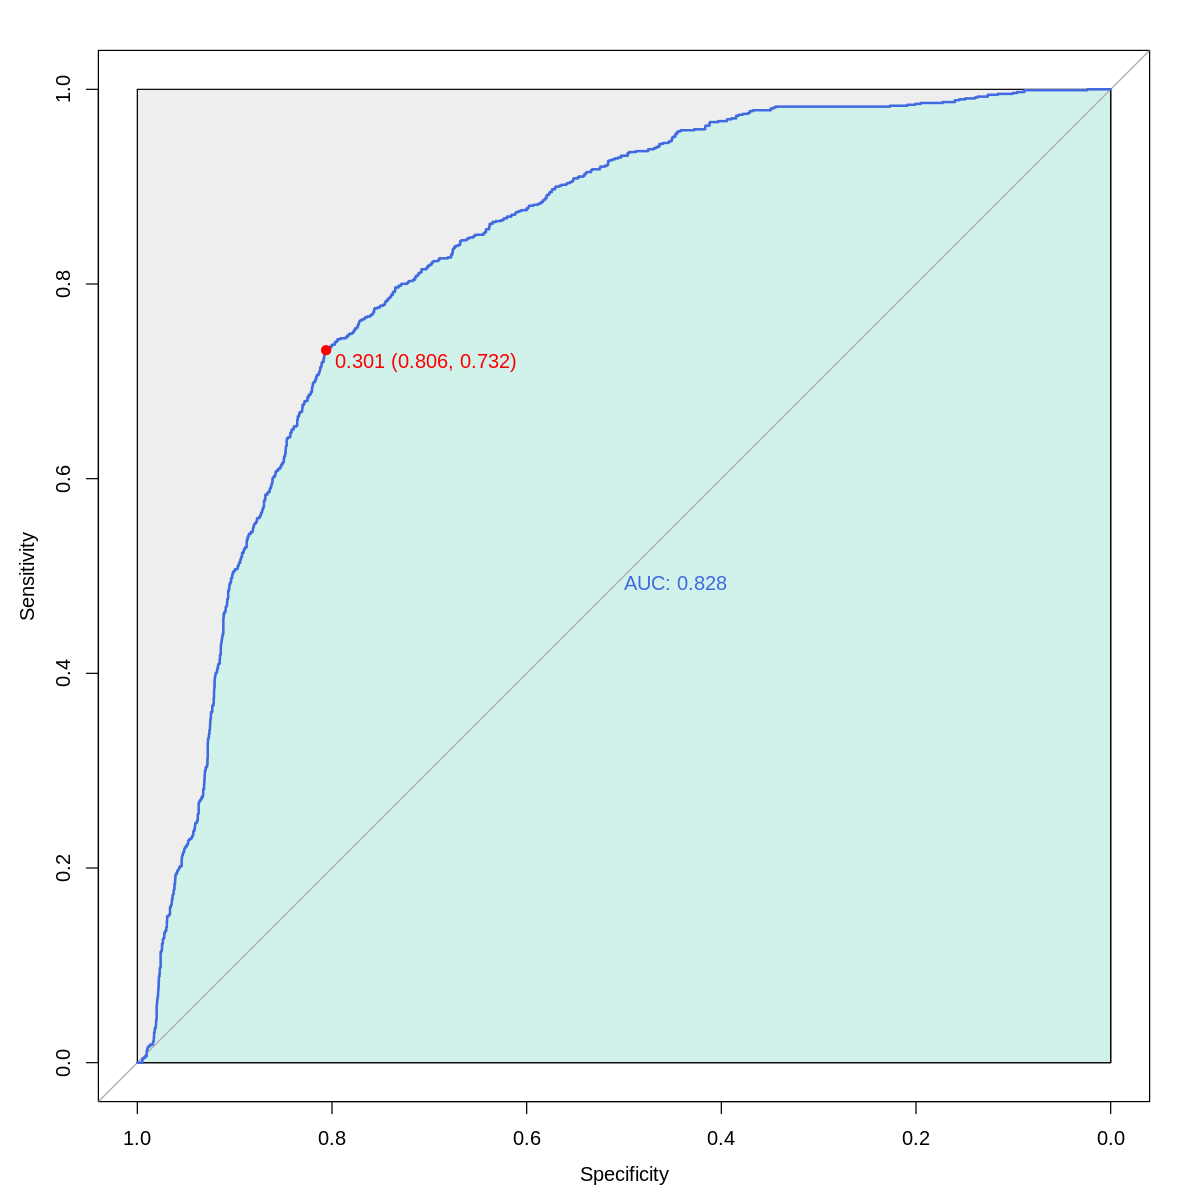

In [ ]:
# ROC 커브를 그린다. 
# x = 특이도,  y =  민감도
# AUC = x축과 ROC커브 사이의 면적으로, 1에 가까울수록 효율적인 모델이다. 



roc_c <- roc(predict_cutoff$left, predict_cutoff$predict_value) # 실제정답과 glm 예측된 확률을 값으로 넘겨준다.
plot.roc(roc_c,   
        col="royalblue",  
        print.auc=TRUE, # AUC 보기위해서
        max.auc.polygon=TRUE,   
        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",#가장 좋은 cut_off_value 출력해라 -> 0.301이 가장좋은 cut_off_value
        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")

In [ ]:
# 최적의 cut_off_value 를 출력하게 도와주는 함수

pROC::coords(roc_c, "best", ret = "threshold", transpose = F)

threshold
<dbl>
0.3010093


* sales를 제거하지 않은 m2 모델과 비교

In [ ]:
predict_value_m2 <- predict(m2, test, type = "response") %>% tibble(predict_value = .)
predict_check_m2 <- test %>% select(left) %>% dplyr::bind_cols(., predict_value_m2) 
roc_c_m2 <- roc(predict_check_m2$left, predict_check_m2$predict_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



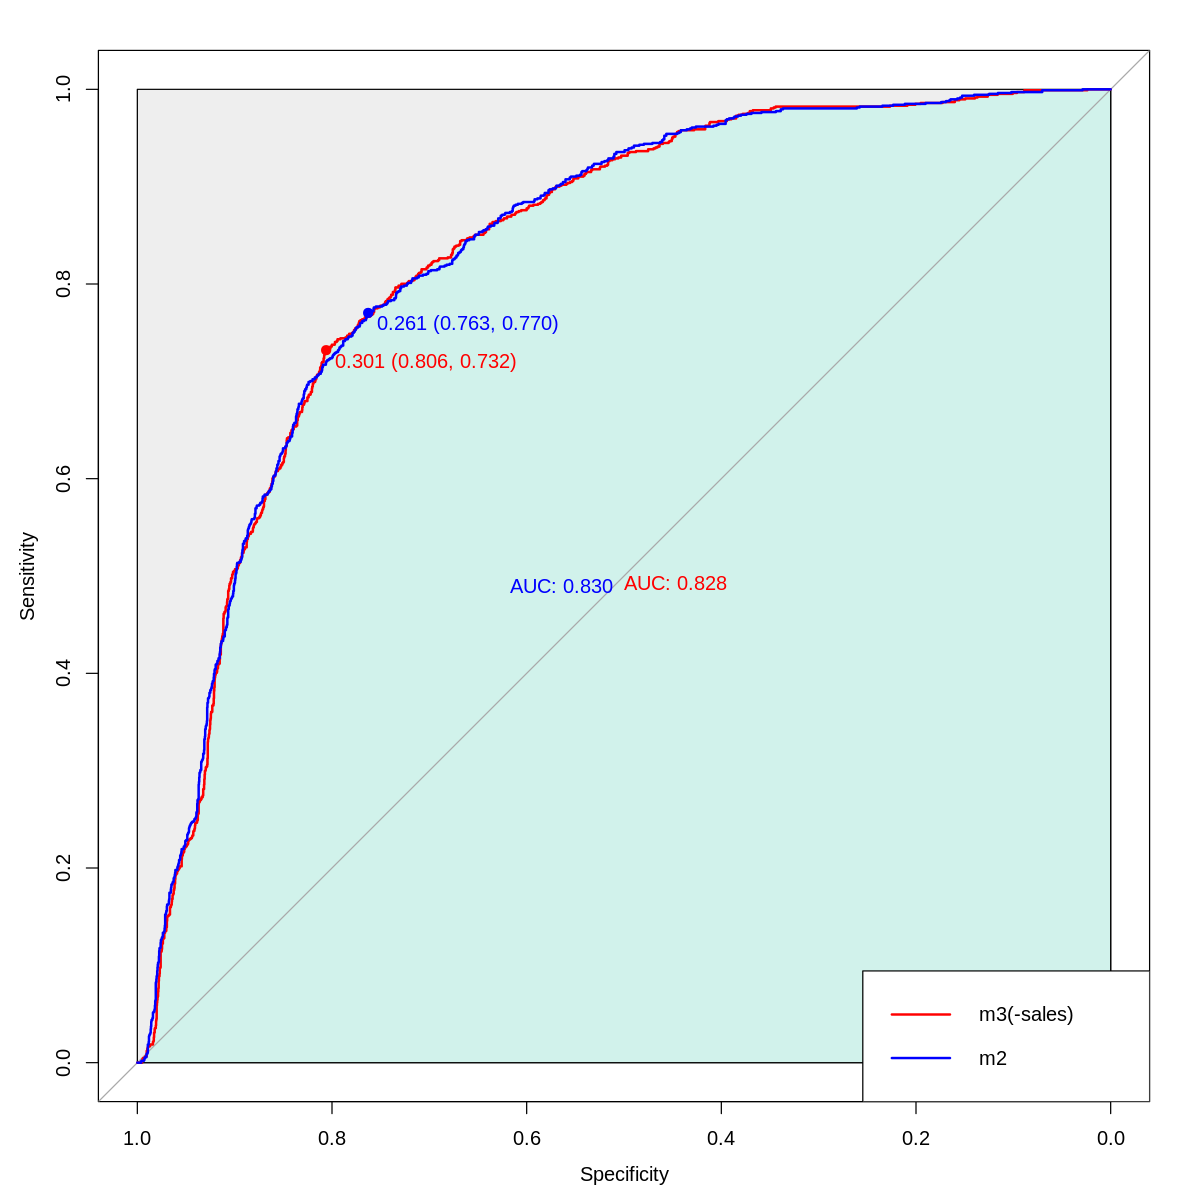

In [ ]:
# sales를 제거하지 않은 자료와 sales를 제거한 자료를 비교해서 ROC커브 그리기
# 거의 차이가 없다.

plot.roc(roc_c,   
         col = "red",   
         print.auc=T, 
         max.auc.polygon=T,   
         print.thres=T, print.thres.pch=19, print.thres.col = "red", 
         auc.polygon=T, auc.polygon.col="#D1F2EB")  

plot.roc(roc_c_m2,   
         add=T,   # 기본 그래프에 추가할 수 있도록 설정
         col="blue",  
         print.auc=T, print.auc.adj=c(1.11,1.2),
         print.thres=T, print.thres.pch=19, print.thres.col = "blue")
         
legend("bottomright", legend=c("m3(-sales)", "m2"), col=c("red", "blue"), lwd = 2)  

- - -

#### **B. 예제 2**

* https://www.kaggle.com/c/titanic/data

**<kaggle의 타이타닉 data>**

  * survived : 생존=1, 죽음=0
  * pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
  * sibsp : 함께 탑승한 형제 또는 배우자 수
  * parch : 함께 탑승한 부모 또는 자녀 수
  * ticket : 티켓 번호
  * cabin : 선실 번호
  * embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:

# kaggle에서 자료 가져오기
# kaggle = 사람들이 데이터로 경쟁하는 곳

DF <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble()

In [ ]:

str(DF)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:

DF %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

* 범주형 변수 확인

In [ ]:
# unique로 범주형 변수 찾기

DF$Survived %>% unique()

[1] 0 1

In [ ]:

DF$Pclass %>% unique()

[1] 3 1 2

In [ ]:

DF$Sex %>% unique()

[1] "male"   "female"

In [ ]:

DF$Ticket %>% unique()

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


In [ ]:

DF$Embarked %>% unique()

[1] "S" "C" "Q" ""

In [ ]:
# 범주형 데이터를 facter로 바꿔줌 -> 더미변수 생성
# age 에서 결측치가 나타난다.

DF <- DF %>% 
 select(-PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)
summary(DF)

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

* Hmisc::impute을 이용한 NA 값 대체(평균, 중앙값, 특정 숫자)

* https://m.blog.naver.com/PostView.nhn?blogId=tjdudwo93&logNo=221142961499&proxyReferer=https:%2F%2Fwww.google.com%2F

In [ ]:
# 결측치를 평균 , 중앙값 으로 대체한다.
install.packages("Hmisc")

library(Hmisc)
DF$Age <- impute(DF$Age, median)# 중앙값을 이용한다.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [ ]:
# 결측치가 제거된것을 알 수 있다.

DF %>% summary()


 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

* train / test 분리

In [ ]:
# train set 과 test set으로 분리한다.
# createDataPartition 함수를 사용하여 데이터를 분리시켜준다.
index <- createDataPartition(y = DF$Survived, p = 0.7, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

# A tibble: 625 x 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0             3 male      22     1     0  7.25 S       
 2 1             1 female    38     1     0 71.3  C       
 3 1             1 female    35     1     0 53.1  S       
 4 0             3 male      35     0     0  8.05 S       
 5 0             1 male      54     0     0 51.9  S       
 6 1             3 female    27     0     2 11.1  S       
 7 1             2 female    14     1     0 30.1  C       
 8 1             3 female     4     1     1 16.7  S       
 9 1             1 female    58     0     0 26.6  S       
10 0             3 male      20     0     0  8.05 S       
# … with 615 more rows
# A tibble: 266 x 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1             3 female 26           0     0  7.92 S       
 2 0             3 male   28           0   

* **train을 이용한 glm 모델 생성**

In [ ]:
# 로지스틱 회귀로 모델을 생성한다. -> 종속변수가 이진일경우 사용함

m <- glm(Survived ~ ., data = train, family = "binomial")
summary(m)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8771  -0.5612  -0.3947   0.5644   2.4712  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.987632 535.411710   0.032   0.9747    
Pclass       -1.182623   0.177511  -6.662 2.70e-11 ***
Sexmale      -2.872845   0.257504 -11.157  < 2e-16 ***
Age          -0.040595   0.009634  -4.214 2.51e-05 ***
SibSp        -0.335380   0.130902  -2.562   0.0104 *  
Parch        -0.151976   0.140028  -1.085   0.2778    
Fare          0.003475   0.003143   1.106   0.2689    
EmbarkedC   -11.226504 535.411343  -0.021   0.9833    
EmbarkedQ   -11.629703 535.411422  -0.022   0.9827    
EmbarkedS   -11.773222 535.411321  -0.022   0.9825    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 832.49  on 624  degrees of freedom
Residual devianc

* **유의하지 않은 설명변수 제거(step 이용)**

In [ ]:
# 설명변수를 제거해준다. -> z-value  결과 안좋은 것들 제거하기
# 유의하지 않은 변수들을 제거해준다.

m2 <- step(m, direction = "backward")

Start:  AIC=550.23
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   534.24 548.24
- Parch     1   531.45 549.45
- Fare      1   531.70 549.70
<none>          530.23 550.23
- SibSp     1   537.91 555.91
- Age       1   549.41 567.41
- Pclass    1   574.71 592.71
- Sex       1   693.49 711.49

Step:  AIC=548.24
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Parch   1   535.68 547.68
<none>        534.24 548.24
- Fare    1   536.67 548.67
- SibSp   1   543.51 555.51
- Age     1   553.62 565.62
- Pclass  1   582.95 594.95
- Sex     1   707.70 719.70

Step:  AIC=547.68
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance    AIC
- Fare    1   537.46 547.46
<none>        535.68 547.68
- SibSp   1   548.06 558.06
- Age     1   555.12 565.12
- Pclass  1   589.01 599.01
- Sex     1   710.98 720.98

Step:  AIC=547.46
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<n

In [ ]:
# 유의하지 않은 변수들이 제거된것을 알 수 있다.

summary(m2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9065  -0.5586  -0.3870   0.5658   2.4546  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.728172   0.595353   9.621  < 2e-16 ***
Pclass      -1.335457   0.149011  -8.962  < 2e-16 ***
Sexmale     -2.847343   0.242839 -11.725  < 2e-16 ***
Age         -0.040814   0.009521  -4.287 1.81e-05 ***
SibSp       -0.370124   0.123264  -3.003  0.00268 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 832.49  on 624  degrees of freedom
Residual deviance: 537.46  on 620  degrees of freedom
AIC: 547.46

Number of Fisher Scoring iterations: 5


* **test를 이용한 예측**

In [ ]:
# test를 이용해서 예측한다.
# type을 response로 설정해 줌으로써 확률로 값이 나온다.

predict_value <- predict(m2, test, type = "response") %>% tibble(predict_value = .)
predict_check <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 266 x 2
   Survived predict_value
   <fct>            <dbl>
 1 1               0.659 
 2 0               0.0938
 3 0               0.0897
 4 1               0.693 
 5 1               0.282 
 6 0               0.522 
 7 0               0.228 
 8 1               0.752 
 9 1               0.599 
10 1               0.641 
# … with 256 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



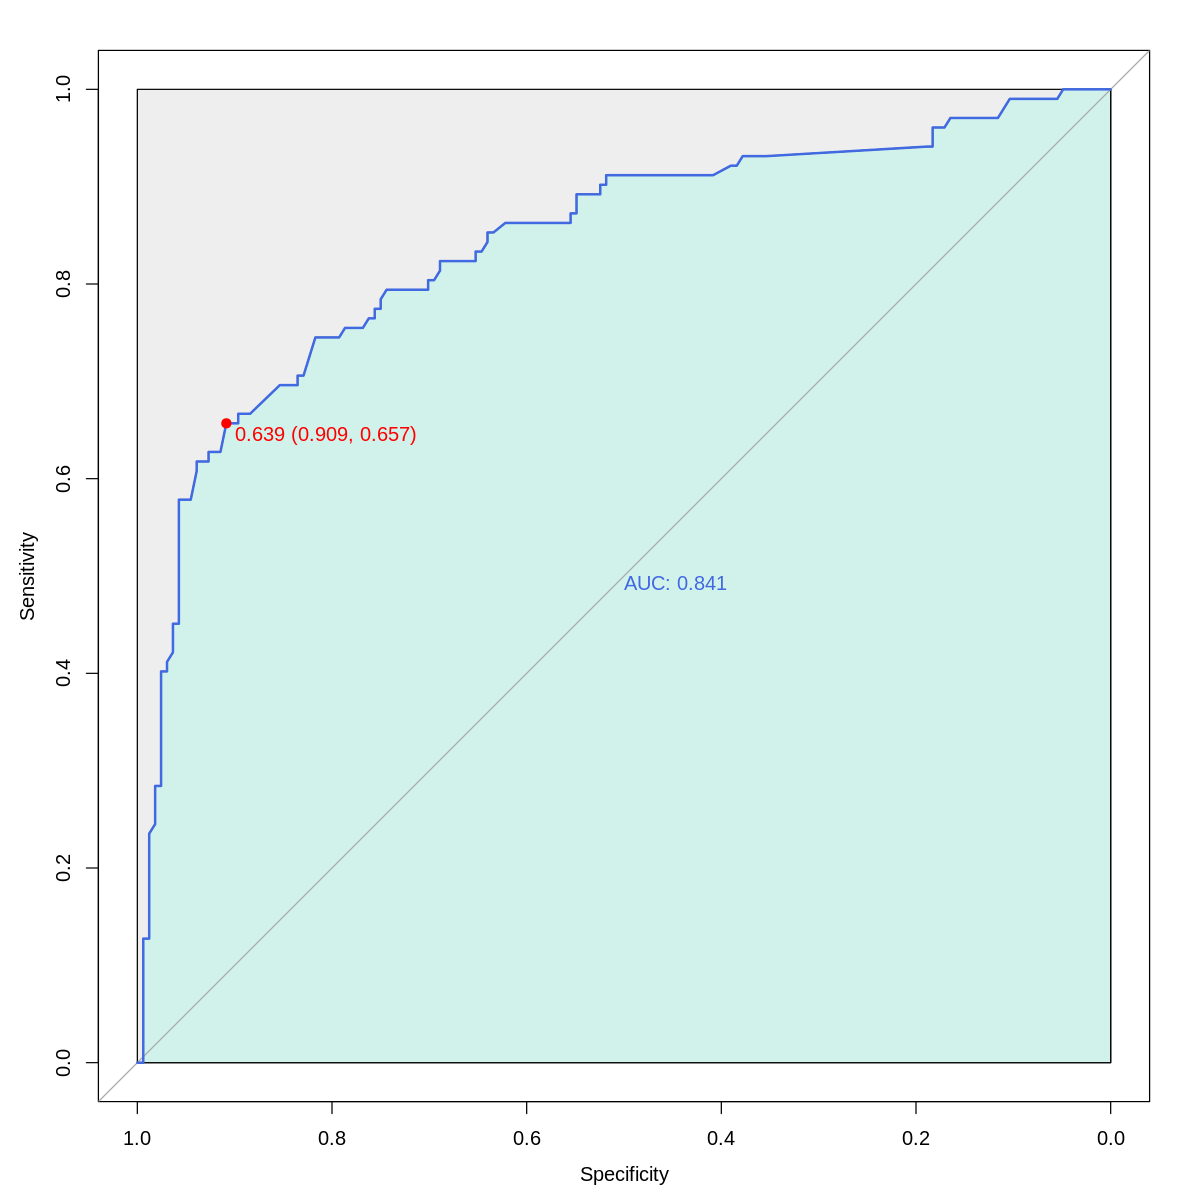

In [ ]:
# 정답과 예측값을 넣어줘서 ROC 커브를 그려준다.

roc <- roc(predict_check$Survived, predict_check$predict_value)
plot.roc(roc,   
        col="royalblue",  
        print.auc=TRUE, 
        max.auc.polygon=TRUE,   
        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")

In [ ]:
# 가장좋은 cut_off_value 값을 찾아준다
pROC::coords(roc, "best", ret = "threshold", transpose = F)

threshold
<dbl>
0.6393213


* 생성한 모델을 이용하여 kaggle에 제출해보기 ㅎ

In [ ]:
# 데이터 가져오기

test_kaggle <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv", sep = ",") %>% as_tibble()
test_kaggle %>% summary()

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

* NA 값 추정(median)

In [ ]:

test_kaggle$Age <- impute(test_kaggle$Age, median)# 결측치를 중앙값으로 대체
test_kaggle %>% summary()


 86 values imputed to 27 



  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.60   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

* 범주형 변수

In [ ]:
# 범주형 변수로 바꿔준다.

test_kaggle <- test_kaggle %>% 
 select(-Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)
summary(test_kaggle)


 86 values imputed to 27 



  PassengerId         Pclass          Sex           Age            SibSp       
 Min.   : 892.0   Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000  
 1st Qu.: 996.2   1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000  
 Median :1100.5   Median :3.000                Median :27.00   Median :0.0000  
 Mean   :1100.5   Mean   :2.266                Mean   :29.60   Mean   :0.4474  
 3rd Qu.:1204.8   3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000  
 Max.   :1309.0   Max.   :3.000                Max.   :76.00   Max.   :8.0000  
                                                                               
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000   C:102   
 1st Qu.:0.0000   1st Qu.:  7.896   Q: 46   
 Median :0.0000   Median : 14.454   S:270   
 Mean   :0.3923   Mean   : 35.627           
 3rd Qu.:0.0000   3rd Qu.: 31.500           
 Max.   :9.0000   Max.   :512.329           
                  NA's   :1                 

* 예측

In [ ]:

predict_value <- predict(m2, test_kaggle, type = "response") %>% tibble(Survived = .)
predict_cutoff <- test_kaggle %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value) %>%
 mutate(Survived = ifelse(Survived >= 0.4169107, 1, 0))# cut_off_value를 최적으로 바꿔준다. 모델 만들때마다 계속 변경됨

In [ ]:

predict_cutoff %>% show()

# A tibble: 418 x 2
   PassengerId Survived
         <int>    <dbl>
 1         892        0
 2         893        0
 3         894        0
 4         895        0
 5         896        1
 6         897        0
 7         898        1
 8         899        0
 9         900        1
10         901        0
# … with 408 more rows


In [ ]:
# 데이터 생성 ->  kaggle에 제출하기 위해서 

predict_cutoff %>% write_csv(path = "submission.csv")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
